#  **🏦 FraudSense: Advancing Fraud Detection through CTGAN-Based Synthetic Transaction Data**

This project focuses on generating privacy-preserving synthetic bank transaction data using Conditional Tabular Generative Adversarial Networks (CTGAN). The objective is to strengthen fraud detection research by creating high-quality, realistic datasets for model training and benchmarking — all without compromising sensitive customer information.

The synthetic data effectively captures real-world transactional patterns, including transaction types, devices, merchant categories, spending behaviors, and account dynamics, while maintaining the statistical integrity and diversity of the original dataset.

By leveraging CTGAN, this project bridges the gap between data scarcity and data privacy, enabling researchers and data scientists to develop, evaluate, and compare fraud detection algorithms under realistic yet secure conditions.    

GitHub Link: [Github](https://github.com/Sajrudin/Synthetic-Data_Fraud_Detection-AI-Project)

---

---

## 📊 **Data Summary**

The dataset used in this project is sourced from the **Kaggle Credit Card Fraud Detection Dataset**, which contains anonymized records of real-world credit card transactions. It is widely used for benchmarking fraud detection models in financial systems.

### 📁 **Dataset Overview**
- **Total Records:** 200,000 transactions  
- **Total Features:** 24  
  - **Categorical Features:** 19  
  - **Numerical Features:** 5  
- **Target Variable:** `Is_Fraud`  
  - `0` → Normal (Legitimate) Transaction  
  - `1` → Fraudulent Transaction  

### ⚖️ **Class Distribution**
| Class | Count | Percentage |
|:------|:------:|:-----------:|
| Legitimate (0) | 189,912 | 94.9% |
| Fraudulent (1) | 10,088 | 5.1% |

> The dataset is **imbalanced**, as fraudulent transactions make up only about 5% of the total data. This imbalance can cause models to favor non-fraud predictions, so data augmentation or class-weight adjustments are applied during training.

### 🧩 **Feature Composition**
- **Categorical Attributes:** Include transaction identifiers and contextual details such as `Customer_ID`, `Gender`, `State`, `City`, `Transaction_Type`, `Merchant_Category`, and `Transaction_Device`.  
- **Numerical Attributes:** Include `Age`, `Transaction_Amount`, and `Account_Balance`, which help the model capture spending behavior and financial thresholds.  
- **Temporal Features:** `Transaction_Date` and `Transaction_Time` capture when transactions occur — often critical for identifying unusual activity patterns.

### 🔍 **Data Quality Insights**
- Missing values and inconsistencies were handled using a preprocessing pipeline.  
- Date and time columns were standardized into a consistent format.  
- Outlier transactions were analyzed to preserve meaningful fraud patterns.  
- Categorical features were encoded using One-Hot or Label Encoding for model input compatibility.

### 🎯 **Objective**
The dataset serves to train and evaluate machine learning models that can accurately classify transactions as **fraudulent or legitimate**, improving fraud detection precision, recall, and overall model reliability in real-world banking environments.


## 📌 **Challenge**

The dataset exhibits a significant class imbalance, with only around 5% of transactions classified as fraudulent. This imbalance poses a major challenge for machine learning models, as they tend to favor the majority (non-fraudulent) class during training. Consequently, the models often achieve high overall accuracy but struggle to detect rare fraudulent patterns, resulting in low recall and an increased likelihood of undetected fraud cases.

---

## 📊 **Exploratory Data Analysis (EDA)**

### ⚙️** Library Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

### 📂 **Load & Read Data**

#### 1. Initial Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### 2. Load dataset

In [ ]:
path = "/content/drive/MyDrive/GNCIPL_Internship_Projects/Finance/Data/Bank_Transaction.csv"
data = pd.read_csv(path)

#### 3. Creating a copy of the dataset

In [ ]:
df = data.copy()

## 👉 1. **Overall Structure of the Dataset**


#### Step 1: Basic Characteristics of the Data

In [ ]:
# ---- Step 1: Basic Characteristics ----
print("\n" + "="*50)
print("## Step 1: Basic Characteristics of the Data")
print("="*50 + "\n")

# Dataset shape
print(f"🔹 Shape of dataset: {df.shape} ")
print(f"🔹 Number of observations: {df.shape[0]}")
print(f"🔹 Number of variables: {df.shape[1]}")
print("\n" + "-"*50)


# Data types
print("🔹 Data Types:\n")
print(df.dtypes.to_string())
print("="*50 + "\n")



## Step 1: Basic Characteristics of the Data

🔹 Shape of dataset: (200000, 24) 
🔹 Number of observations: 200000
🔹 Number of variables: 24

--------------------------------------------------
🔹 Data Types:

Customer_ID                 object
Customer_Name               object
Gender                      object
Age                          int64
State                       object
City                        object
Bank_Branch                 object
Account_Type                object
Transaction_ID              object
Transaction_Date            object
Transaction_Time            object
Transaction_Amount         float64
Merchant_ID                 object
Transaction_Type            object
Merchant_Category           object
Account_Balance            float64
Transaction_Device          object
Transaction_Location        object
Device_Type                 object
Is_Fraud                     int64
Transaction_Currency        object
Customer_Contact            object
Transaction_Description

**Insight**:

- Helps understand the size of the dataset.

- Check if dataset is small, medium, or large — which can influence preprocessing and modeling steps.

---

#### Step 2: Overall Structure

In [ ]:
# ---- Step 2: Overall Structure ----
print("\n" + "="*50)
print("## Step 2: Overall Structure of the Dataset")
print("="*50 + "\n")

# Missing values
missing = df.isnull().sum()
print(f"🔹 Total Missing Values: {missing.sum()}\n")

# Target variable distribution
print("🔹 Target Variable: Class Distribution")
print(df['Is_Fraud'].value_counts().to_string())
print("\nPercentage Distribution:")
print((df['Is_Fraud'].value_counts(normalize=True) * 100).round(3).to_string())
print("\n" + "-"*50)


## Step 2: Overall Structure of the Dataset

🔹 Total Missing Values: 0

🔹 Target Variable: Class Distribution
Is_Fraud
0    189912
1     10088

Percentage Distribution:
Is_Fraud
0    94.956
1     5.044

--------------------------------------------------


#### Separate categorical vs numerical columns

In [ ]:
# Separate categorical vs numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

print("🔹 Column Types\n")
print("Categorical Columns:")
for col in categorical_cols:
    print(f"  - {col}", end="")
print("\nNumerical Columns:")
for col in numerical_cols:
    print(f"   - {col}", end="")
print("\n","="*50 + "\n")

🔹 Column Types

Categorical Columns:
  - Customer_ID  - Customer_Name  - Gender  - State  - City  - Bank_Branch  - Account_Type  - Transaction_ID  - Transaction_Date  - Transaction_Time  - Merchant_ID  - Transaction_Type  - Merchant_Category  - Transaction_Device  - Transaction_Location  - Device_Type  - Transaction_Currency  - Customer_Contact  - Transaction_Description  - Customer_Email
Numerical Columns:
   - Age   - Transaction_Amount   - Account_Balance   - Is_Fraud



#### Displaying Data

In [ ]:
df.head()

Customer_ID        Customer_Name  Gender  Age  \
0  d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e           Osha Tella    Male   60   
1  7c14ad51-781a-4db9-b7bd-67439c175262      Hredhaan Khosla  Female   51   
2  3a73a0e5-d4da-45aa-85f3-528413900a35       Ekani Nazareth    Male   20   
3  7902f4ef-9050-4a79-857d-9c2ea3181940  Yamini Ramachandran  Female   57   
4  3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9         Kritika Rege  Female   43   

         State                City                Bank_Branch Account_Type  \
0       Kerala  Thiruvananthapuram  Thiruvananthapuram Branch      Savings   
1  Maharashtra              Nashik              Nashik Branch     Business   
2        Bihar           Bhagalpur           Bhagalpur Branch      Savings   
3   Tamil Nadu             Chennai             Chennai Branch     Business   
4       Punjab            Amritsar            Amritsar Branch      Savings   

                         Transaction_ID Transaction_Date  ...  \
0  4fa3208f-9e23-42dc-b330-844829d0c12c       23-01-2025  ...   
1  c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c       11-01-2025  ...   
2  e41c55f9-c016-4ff3-872b-cae72467c75c       25-01-2025  ...   
3  7f7ee11b-ff2c-45a3-802a-49bc47c02ecb       19-01-2025  ...   
4  f8e6ac6f-81a1-4985-bf12-f60967d852ef       30-01-2025  ...   

  Merchant_Category  Account_Balance Transaction_Device  \
0        Restaurant         74557.27    Voice Assistant   
1        Restaurant         74622.66  POS Mobile Device   
2         Groceries         66817.99                ATM   
3     Entertainment         58177.08     POS Mobile App   
4     Entertainment         16108.56       Virtual Card   

         Transaction_Location Device_Type  Is_Fraud Transaction_Currency  \
0  Thiruvananthapuram, Kerala         POS         0                  INR   
1         Nashik, Maharashtra     Desktop         0                  INR   
2            Bhagalpur, Bihar     Desktop         0                  INR   
3         Chennai, Tamil Nadu      Mobile         0                  INR   
4            Amritsar, Punjab      Mobile         0                  INR   

  Customer_Contact Transaction_Description           Customer_Email  
0   +9198579XXXXXX     Bitcoin transaction      oshaXXXXX@XXXXX.com  
1   +9191074XXXXXX        Grocery delivery  hredhaanXXXX@XXXXXX.com  
2   +9197745XXXXXX  Mutual fund investment      ekaniXXX@XXXXXX.com  
3   +9195889XXXXXX           Food delivery  yaminiXXXXX@XXXXXXX.com  
4   +9195316XXXXXX          Debt repayment   kritikaXXXX@XXXXXX.com  

[5 rows x 24 columns]

#### Device Type

In [ ]:
df['Device_Type'].unique()

array(['POS', 'Desktop', 'Mobile', 'ATM'], dtype=object)

##👉 2. **Statistical Analysis**

In [ ]:
# For Fraud Data
df[df['Is_Fraud']==1].describe()

Age  Transaction_Amount  Account_Balance  Is_Fraud
count  10088.000000        10088.000000     10088.000000   10088.0
mean      43.914453        49277.925242     52452.891412       1.0
std       15.265150        28739.518843     27300.467424       0.0
min       18.000000           10.410000      5003.420000       1.0
25%       31.000000        24420.042500     29122.987500       1.0
50%       44.000000        49162.945000     52344.725000       1.0
75%       57.000000        74068.717500     76116.032500       1.0
max       70.000000        98999.020000     99999.950000       1.0

In [ ]:
# For Non-Fraud Data
df[df['Is_Fraud']==0].describe()

Age  Transaction_Amount  Account_Balance  Is_Fraud
count  189912.000000       189912.000000    189912.000000  189912.0
mean       44.020457        49551.831380     52437.197166       0.0
std        15.290050        28541.881772     27404.829445       0.0
min        18.000000           10.290000      5000.820000       0.0
25%        31.000000        24877.685000     28723.887500       0.0
50%        44.000000        49517.420000     52373.715000       0.0
75%        57.000000        74326.872500     76148.875000       0.0
max        70.000000        98999.980000     99998.680000       0.0

## 👉 3. **Class Distribution**

In [ ]:
value_count = df['Is_Fraud'].value_counts()
fig = px.pie(
    names=['No Fraud', 'Fraud'],
    values=value_count,
    title="Class Distribution",
    color=['No Fraud', 'Fraud'],
    color_discrete_map={'No Fraud': 'skyblue', 'Fraud': 'salmon'}
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## 👉 4. **Transaction Amount Distribution by Fraud**

In [ ]:
fig2 = px.box(
    df,
    x="Is_Fraud",
    y="Transaction_Amount",
    color="Is_Fraud",
    title="Transaction Amount Distribution by Fraud",
    color_discrete_map={0:"blue",1:"red"}
)
fig2.show()


##👉 5. **Fraud Count by Transaction Type**

In [ ]:
fig3 = px.bar(
    df.groupby(["Transaction_Type","Is_Fraud"]).size().reset_index(name="Count"),
    x="Transaction_Type",
    y="Count",
    color="Is_Fraud",
    barmode="group",
    title="Fraud by Transaction Type"
)
fig3.show()


## 👉 6. **Fraud by Device Type (Bar Chart)**

In [ ]:
fig4 = px.bar(
    df.groupby(["Device_Type","Is_Fraud"]).size().reset_index(name="Count"),
    x="Device_Type",
    y="Count",
    color="Is_Fraud",
    barmode="group",
    title="Fraud by Device Type"
)
fig4.show()


## 👉 7. **Transaction Amount vs Account Balance**

In [ ]:
fig5 = px.scatter(
    df,
    x="Account_Balance",
    y="Transaction_Amount",
    color="Is_Fraud",
    title="Transaction Amount vs Account Balance",
    hover_data=["Customer_ID","Merchant_Category"]
)
fig5.show()


Output hidden; open in https://colab.research.google.com to view.

##👉  8. **Fraud by State (Geo Heatmap / Choropleth)**

In [ ]:
fig6 = px.histogram(
    df,
    x="State",
    color="Is_Fraud",
    barmode="group",
    title="Fraud by State"
)
fig6.show()


Output hidden; open in https://colab.research.google.com to view.

##👉 9. **Fraud by Transaction Time**

In [ ]:
# Map numeric fraud labels to strings for clarity
df["Hour"] = pd.to_datetime(df["Transaction_Time"], errors="coerce").dt.hour

df["Fraud_Label"] = df["Is_Fraud"].map({0: "Non-Fraud", 1: "Fraud"})

fig7 = px.histogram(
    df,
    x="Hour",
    color="Fraud_Label",
    barmode="stack",  # stack makes it easier to read
    nbins=24,
    title="Fraud Transactions by Hour of Day",
    color_discrete_map={"Non-Fraud": "skyblue", "Fraud": "red"},
    labels={"Hour": "Transaction Hour", "Fraud_Label": "Transaction Type"},
    text_auto=True
)
fig7.update_layout(
    xaxis=dict(tickmode='linear', dtick=1),  # show each hour 0-23
    yaxis_title="Number of Transactions",
    bargap=0.1
)

fig7.show()

##👉 10. **Fraud by Merchant Category**

In [ ]:
# Prepare data
merchant_df = df.groupby(["Merchant_Category","Is_Fraud"]).size().reset_index(name="Count")
merchant_df["Fraud_Label"] = merchant_df["Is_Fraud"].map({0: "Non-Fraud", 1: "Fraud"})

# Convert to percentage
merchant_total = merchant_df.groupby("Merchant_Category")["Count"].transform("sum")
merchant_df["Percentage"] = (merchant_df["Count"] / merchant_total * 100).round(2)

# Plot
fig8 = px.bar(
    merchant_df,
    x="Merchant_Category",
    y="Percentage",
    color="Fraud_Label",
    barmode="stack",
    title="Fraud Percentage by Merchant Category",
    text="Percentage",
    color_discrete_map={"Non-Fraud": "green", "Fraud": "red"}  # custom colors
)

fig8.update_traces(texttemplate='%{text}%', textposition="inside")
fig8.update_layout(xaxis={'categoryorder':'total ascending'})  # sort by total ascending
fig8.show()



In [ ]:
df.head()

Customer_ID        Customer_Name  Gender  Age  \
0  d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e           Osha Tella    Male   60   
1  7c14ad51-781a-4db9-b7bd-67439c175262      Hredhaan Khosla  Female   51   
2  3a73a0e5-d4da-45aa-85f3-528413900a35       Ekani Nazareth    Male   20   
3  7902f4ef-9050-4a79-857d-9c2ea3181940  Yamini Ramachandran  Female   57   
4  3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9         Kritika Rege  Female   43   

         State                City                Bank_Branch Account_Type  \
0       Kerala  Thiruvananthapuram  Thiruvananthapuram Branch      Savings   
1  Maharashtra              Nashik              Nashik Branch     Business   
2        Bihar           Bhagalpur           Bhagalpur Branch      Savings   
3   Tamil Nadu             Chennai             Chennai Branch     Business   
4       Punjab            Amritsar            Amritsar Branch      Savings   

                         Transaction_ID Transaction_Date  ... Account_Balance  \
0  4fa3208f-9e23-42dc-b330-844829d0c12c       23-01-2025  ...        74557.27   
1  c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c       11-01-2025  ...        74622.66   
2  e41c55f9-c016-4ff3-872b-cae72467c75c       25-01-2025  ...        66817.99   
3  7f7ee11b-ff2c-45a3-802a-49bc47c02ecb       19-01-2025  ...        58177.08   
4  f8e6ac6f-81a1-4985-bf12-f60967d852ef       30-01-2025  ...        16108.56   

   Transaction_Device        Transaction_Location Device_Type Is_Fraud  \
0     Voice Assistant  Thiruvananthapuram, Kerala         POS        0   
1   POS Mobile Device         Nashik, Maharashtra     Desktop        0   
2                 ATM            Bhagalpur, Bihar     Desktop        0   
3      POS Mobile App         Chennai, Tamil Nadu      Mobile        0   
4        Virtual Card            Amritsar, Punjab      Mobile        0   

   Transaction_Currency Customer_Contact Transaction_Description  \
0                   INR   +9198579XXXXXX     Bitcoin transaction   
1                   INR   +9191074XXXXXX        Grocery delivery   
2                   INR   +9197745XXXXXX  Mutual fund investment   
3                   INR   +9195889XXXXXX           Food delivery   
4                   INR   +9195316XXXXXX          Debt repayment   

            Customer_Email  Fraud_Label  
0      oshaXXXXX@XXXXX.com    Non-Fraud  
1  hredhaanXXXX@XXXXXX.com    Non-Fraud  
2      ekaniXXX@XXXXXX.com    Non-Fraud  
3  yaminiXXXXX@XXXXXXX.com    Non-Fraud  
4   kritikaXXXX@XXXXXX.com    Non-Fraud  

[5 rows x 25 columns]

##👉 11. **Transaction Amount Distribution: Fraud vs Non-Fraud**

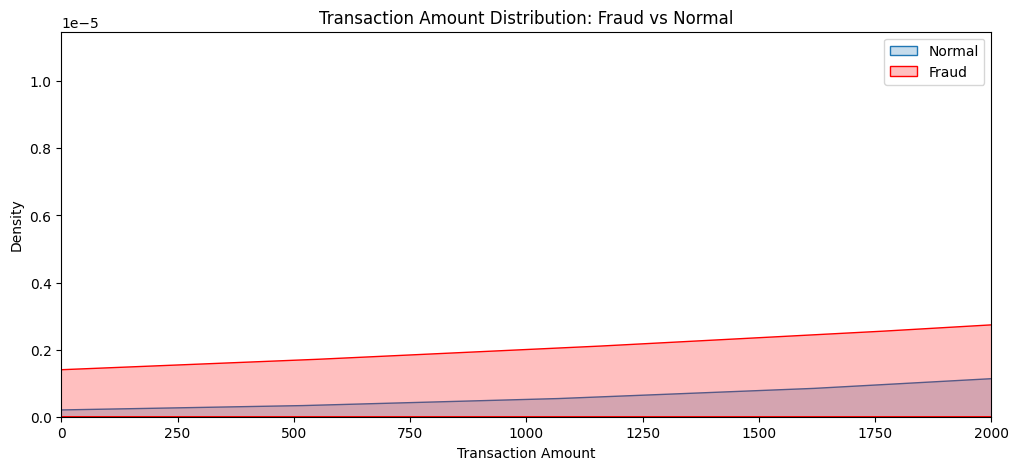

In [ ]:
fraud = df[df['Is_Fraud'] == 1]
normal = df[df['Is_Fraud'] == 0]

plt.figure(figsize=(12,5))
sns.kdeplot(normal['Account_Balance'], label='Normal', fill=True)
sns.kdeplot(fraud['Account_Balance'], label='Fraud', fill=True, color='red')
plt.title("Transaction Amount Distribution: Fraud vs Normal")
plt.xlabel("Transaction Amount")
plt.xlim(0, 2000)
plt.legend()
plt.show()


 ## 👉 12. **Boxplot of Transaction Amount by Class**

In [ ]:
# Boxplot for Transaction Amount
fig = px.box(
    df,
    x="Fraud_Label",
    y="Transaction_Amount",
    color="Fraud_Label",
    color_discrete_map={"Non-Fraud": "#008080", "Fraud": "#FFA500"},  # complementary colors
    title="Transaction Amount Distribution: Fraud vs Non-Fraud",
    labels={"Fraud_Label": "Transaction Type", "Transaction_Amount": "Amount"}
)

fig.update_layout(showlegend=False)
fig.show()